In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import display, HTML

В файле Cellphonedata.xlsx содержатся данные о численности населения и количестве мобильных телефонов для 20 стран с наибольшим количеством мобильных телефонов. На основе этих данных выполните задания 1—5.
1. Создайте гистограмму, суммирующую количество телефонов по странам.
2. Создайте точечную диаграмму, отображающую соотношение количества телефонов к численности населения.
3. Настройте срез для фильтрации гистограммы с группировкой для количества мобильных телефонов по странам.
4. Создайте правило фрагментирования для фильтрации гистограммы, суммирующей количество телефонов по странам.
5. Отобразите данные о численности населения на карте.

In [3]:
cellphones = pd.read_excel('~/Study/excel/Ch46/Practice Files/Cellphonedata.xlsx')

In [4]:
cellphones.head()

,Rank,Country,Number of mobile phones,Population
0,1,China,1150000000,1349585838
1,2,India,867800000,1220800359
2,3,United States,327577529,310866000
3,4,Brazil,265741000,192379287
4,5,Russia,256117000,142905200


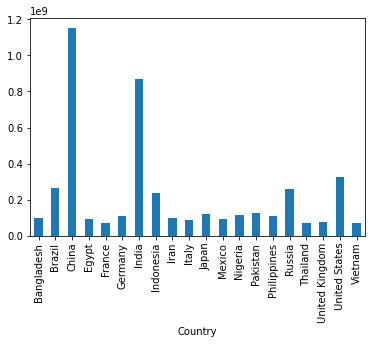

In [20]:
cellphones.groupby('Country')['Number of mobile phones'].sum().plot(kind='bar');

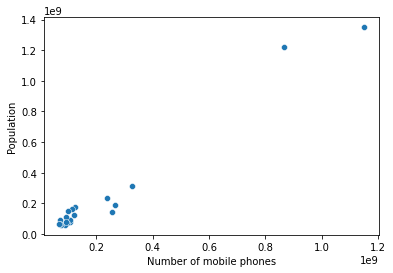

In [25]:
sns.scatterplot(data=cellphones, x='Number of mobile phones', y='Population');

***
На основе данных о филиалах банка создайте спарклайны-графики с одним и тем же масштабом для каждого филиала.

In [73]:
sparklines = pd.read_excel('~/Study/excel/Ch47/Practice Files/sparklines.xlsx',
                          usecols=range(2,9), skiprows=6).rename(columns={'Unnamed: 2': 'City'})

/Users/popov/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [158]:
def sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    
    plt.plot(data.argmin(), data.min(), 'r.')
    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [159]:
sparklines['Summary'] = sparklines.loc[:, 'Monday': 'Friday'].apply(sparkline, axis=1)

In [160]:
HTML(sparklines.to_html(escape=False))

,City,Monday,Tuesday,Wednesday,Thursday,Friday,Summary
0,New York,1176,768,808,864,1235,
1,Rochester,475,323,333,356,515,
2,Utica,360,250,228,275,378,
3,Syracuse,594,412,408,459,618,
4,Buffalo,698,475,504,551,803,
5,Ossining,306,208,204,234,322,
6,Ithaca,437,288,294,299,450,


***
Зафиксируйте взлеты и падения рынка с помощью спарклайнов выигрыша/проигрыша. Как и в предыдущем случае, данные находятся в файле Dow.xlsx.

In [115]:
dow = pd.read_excel('~/Study/excel/Ch47/Practice Files/Dow.xlsx')

In [116]:
dow.head()

,Date,Adj Close
0,2010-01-04,10583.96
1,2010-01-05,10572.02
2,2010-01-06,10573.68
3,2010-01-07,10606.86
4,2010-01-08,10618.19


In [171]:
HTML(dow.assign(Change=dow['Adj Close'].pct_change())
 .style
 .format({'Date': '{:%Y %m}'})
 .bar(subset=['Change'],
      align='mid',
      color=['red', 'green'],
     )
 .set_properties(**{'text-align': 'center'}, subset='Change')
 .render()
)

,Date,Adj Close,Change
0,2010 01,10583.960000,nan
1,2010 01,10572.020000,-0.001128
2,2010 01,10573.680000,0.000157
3,2010 01,10606.860000,0.003138
4,2010 01,10618.190000,0.001068
5,2010 01,10663.990000,0.004313
6,2010 01,10627.260000,-0.003444
7,2010 01,10680.770000,0.005035
8,2010 01,10710.550000,0.002788
9,2010 01,10609.650000,-0.009421


***
В файле Goals.xlsx для каждого месяца содержатся процентные отношения, касающиеся достижения целей филиалами банка. Обработайте эти данные с помощью спарклайнов выигрыша/проигрыша.

In [137]:
goals = pd.read_excel('~/Study/excel/Ch47/Practice Files/Goals.xlsx',
                          usecols=range(3,16), skiprows=6)

In [138]:
goals

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48


In [168]:
def bar_sparkline(data, figsize=(2, 0.25), **kwags):

    data = np.array(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    
    colors = np.where(data < 0, 'red', 'blue')
    plt.bar(range(len(data)), data, width=1, color=colors)
    
    img = BytesIO()
    plt.savefig(img)
    img.seek(0)
    plt.close()
    return '<img src="data:image/png;base64,{}"/>'.format(base64.b64encode(img.read()).decode())

In [169]:
HTML(goals.assign(Summary=goals.loc[:, 'Jan': 'Dec']
                  .apply(bar_sparkline, axis=1))
                  .to_html(escape=False))

,Branch,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summary
0,New York,-0.11,-0.03,-0.12,0.32,0.33,0.57,0.03,0.07,0.47,0.01,0.11,0.70,
1,Rochester,-0.27,-0.39,-0.37,-0.42,-0.38,-0.34,0.08,0.12,0.17,0.31,0.19,0.29,
2,Utica,-0.37,-0.26,-0.37,-0.57,-0.30,-0.55,-0.24,-0.42,-0.30,-0.39,-0.21,-0.28,
3,Syracuse,0.43,0.37,0.14,0.12,0.28,0.33,0.37,0.31,0.26,0.13,0.10,0.48,
